In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [3]:
df = pd.read_csv('../data/autism_dataset_cleaned.csv')

In [4]:
df.head()

,Unnamed: 0,case_no,a1,a2,a3,a4,a5,a6,a7,a8,...,ethnicity_Latino,ethnicity_Native Indian,ethnicity_Others,ethnicity_Pacifica,ethnicity_White European,ethnicity_asian,ethnicity_black,ethnicity_middle eastern,ethnicity_mixed,ethnicity_south asian
0,0,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,1,2,1,1,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
2,2,3,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
3,3,4,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,4,5,1,1,0,1,1,1,1,1,...,0,0,0,0,1,0,0,0,0,0


#### Train Test Split

In [5]:
X = df.drop(columns = ['class_asd_traits'])
y = df['class_asd_traits']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=53)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((843, 27), (211, 27), (843,), (211,))

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 408 to 680
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                843 non-null    int64  
 1   case_no                   843 non-null    int64  
 2   a1                        843 non-null    int64  
 3   a2                        843 non-null    int64  
 4   a3                        843 non-null    int64  
 5   a4                        843 non-null    int64  
 6   a5                        843 non-null    int64  
 7   a6                        843 non-null    int64  
 8   a7                        843 non-null    int64  
 9   a8                        843 non-null    int64  
 10  a9                        843 non-null    int64  
 11  a10                       843 non-null    int64  
 12  age_mons                  843 non-null    float64
 13  sex                       843 non-null    int64  
 14  jaundice

#### Baseline

In [8]:
y_test.value_counts(normalize=True)

1    0.691943
0    0.308057
Name: class_asd_traits, dtype: float64

Baseline Accuracy Score = .69   


#### Defining functions to evaluate models

In [9]:
def class_metrics(y_test, preds):

    acc = accuracy_score(y_test, preds)
    bas = balanced_accuracy_score(y_test, preds)
    rcs = recall_score(y_test, preds)#, pos_label='1')
    prs = precision_score(y_test, preds)#, pos_label='1')
    f1 = f1_score(y_test, preds)#, pos_label='1')
    
    print(f'Accuracy Score = {acc} \nBalanced Accuracy Score = {bas} \nRecall Score = {rcs} \nPrecision Score = {prs} \nF1 Score = {f1}')

In [10]:
def conf_matrix(y_test, preds):
    
    cm=confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

#### Testing different models without hypertuning

In [11]:
#I took inspiration to run several models at once from 
# another Kaggle user's submission on this dataset:
# https://www.kaggle.com/code/khuloodnasher/autism-diagnosis

In [12]:
#modified code from to fit multiple models at once:  https://medium.com/analytics-vidhya/testing-multiple-machine-learning-models-at-once-without-getting-a-headache-5aefb0e7df03
models = [
    ('LR', LogisticRegression(max_iter=1000)),
    ('KNN', KNeighborsClassifier()),
    ('DT', DecisionTreeClassifier()),
    ('RF', RandomForestClassifier()),
    ('SVC', SVC()),
    ('NB', GaussianNB())
]

LogisticRegression(max_iter=1000)
Accuracy Score = 1.0 
Balanced Accuracy Score = 1.0 
Recall Score = 1.0 
Precision Score = 1.0 
F1 Score = 1.0


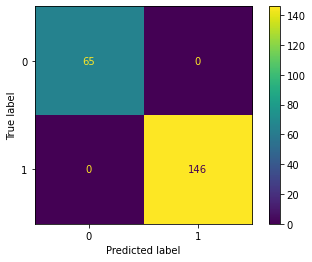

KNeighborsClassifier()
Accuracy Score = 0.6635071090047393 
Balanced Accuracy Score = 0.5605374077976818 
Recall Score = 0.8287671232876712 
Precision Score = 0.7245508982035929 
F1 Score = 0.7731629392971245


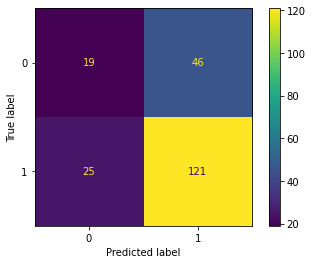

DecisionTreeClassifier()
Accuracy Score = 0.9004739336492891 
Balanced Accuracy Score = 0.8726027397260274 
Recall Score = 0.9452054794520548 
Precision Score = 0.9139072847682119 
F1 Score = 0.9292929292929293


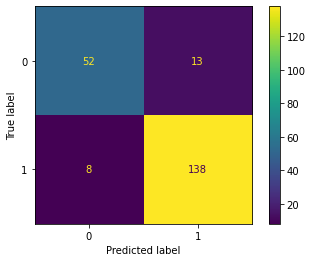

RandomForestClassifier()
Accuracy Score = 0.933649289099526 
Balanced Accuracy Score = 0.9051106427818757 
Recall Score = 0.9794520547945206 
Precision Score = 0.9285714285714286 
F1 Score = 0.9533333333333334


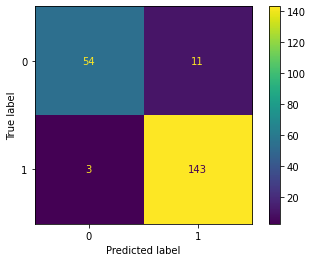

SVC()
Accuracy Score = 0.6919431279620853 
Balanced Accuracy Score = 0.5 
Recall Score = 1.0 
Precision Score = 0.6919431279620853 
F1 Score = 0.8179271708683473


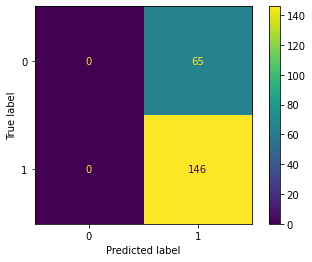

GaussianNB()
Accuracy Score = 0.9146919431279621 
Balanced Accuracy Score = 0.9298208640674395 
Recall Score = 0.8904109589041096 
Precision Score = 0.9848484848484849 
F1 Score = 0.935251798561151


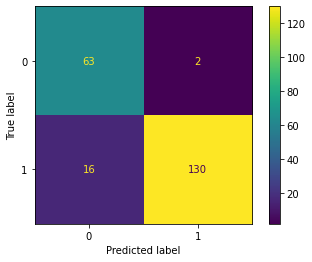

In [13]:
for modelname, model in models:
    modelname = model
    modelname.fit(X_train, y_train)
    preds = modelname.predict(X_test)
    
    print(modelname)
    class_metrics(y_test, preds)
    conf_matrix(y_test, preds)

#### Findings:  
LR model scores perfectly on the test set.  
KNN and SVC score near the baseline accuracy.  
DT, RF, and NB all score well, with accuracy and scores above .9.  
I am going to look at feature importance with LR, and then try to improve a weaker model with hypertuning

#### Logistic Regression Feature Importance

In [14]:
lr = LogisticRegression(max_iter=10_000)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

1.0

In [15]:
X_test.columns

Index(['Unnamed: 0', 'case_no', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8',
       'a9', 'a10', 'age_mons', 'sex', 'jaundice', 'family_mem_with_asd',
       'ethnicity_Hispanic', 'ethnicity_Latino', 'ethnicity_Native Indian',
       'ethnicity_Others', 'ethnicity_Pacifica', 'ethnicity_White European',
       'ethnicity_asian', 'ethnicity_black', 'ethnicity_middle eastern',
       'ethnicity_mixed', 'ethnicity_south asian'],
      dtype='object')

In [16]:
#modified code to create dataframe:  https://towardsdatascience.com/interpreting-coefficients-in-linear-and-logistic-regression-6ddf1295f6f1
pd.DataFrame(lr.coef_[0], X_train.columns, columns=['coef']).sort_values(by='coef', ascending=False)

,coef
a9,2.832437
a2,2.749236
a4,2.572456
a8,2.518182
a5,2.384708
a6,2.342435
a1,2.311868
a7,2.282837
a10,2.170408
a3,1.699224


In [17]:
odds = np.exp(lr.coef_[0])
odds

array([ 1.00184485,  0.99827648, 10.09326467, 15.63069198,  5.46969875,
       13.09795999, 10.85589502, 10.40654916,  9.80445903, 12.40602334,
       16.98680802,  8.761862  ,  1.02479081,  1.14317136,  1.7714065 ,
        0.91775734,  1.03555663,  1.19547098,  1.15873836,  1.64711662,
        1.15207042,  0.84931185,  1.29933505,  0.70423959,  0.83024492,
        0.91071212,  0.62294916])

In [18]:
pd.DataFrame(odds, X_train.columns, columns=['odds']).sort_values(by='odds', ascending=False)

,odds
a9,16.986808
a2,15.630692
a4,13.097960
a8,12.406023
a5,10.855895
a6,10.406549
a1,10.093265
a7,9.804459
a10,8.761862
a3,5.469699


##### Interpretation:
For each unit increase in a2, odds of the patient being classified as autistic are 15.7x as large as odds that patient is not classified as autistic (all else constant).

##### Findings:
Questions A9, A9, and A4 have the highest coefficients. - Yes for A9 indicates being 17x more likely to be classified as showing signs of ASD  
A3 and A10 have the lowest coefficients of the questions   - Yes for A3 indicates being 5.5x more likely to be classified for ASD  
Jaundice: being born with jaundice increase the odds by 1.8x for ASD  
Sex: males are more 1.2x more likely to show signs of ASD     
Family member: from this sample, having a family member with ASD is not a very significant productor, odds .9 compared to those who didn't report a family member with asd   

In [19]:
df.columns

Index(['Unnamed: 0', 'case_no', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8',
       'a9', 'a10', 'age_mons', 'sex', 'jaundice', 'family_mem_with_asd',
       'class_asd_traits', 'ethnicity_Hispanic', 'ethnicity_Latino',
       'ethnicity_Native Indian', 'ethnicity_Others', 'ethnicity_Pacifica',
       'ethnicity_White European', 'ethnicity_asian', 'ethnicity_black',
       'ethnicity_middle eastern', 'ethnicity_mixed', 'ethnicity_south asian'],
      dtype='object')

#### Improving KNN Model

In [20]:
knn = KNeighborsClassifier()
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [21]:
params = {
    'n_neighbors': [2, 4, 8, 10, 20],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'leaf_size': [2, 5, 10, 20, 30, 50]
}

In [22]:
gs = GridSearchCV(knn, param_grid=params, verbose=1, n_jobs=-1)

In [23]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [2, 5, 10, 20, 30, 50],
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [2, 4, 8, 10, 20],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [24]:
gs.score(X_test, y_test)

0.7440758293838863

In [25]:
gs.best_params_

{'leaf_size': 2,
 'metric': 'manhattan',
 'n_neighbors': 8,
 'weights': 'distance'}

In [26]:
gs_preds = gs.predict(X_test)

In [27]:
class_metrics(y_test, gs_preds)

Accuracy Score = 0.7440758293838863 
Balanced Accuracy Score = 0.6571654373024236 
Recall Score = 0.8835616438356164 
Precision Score = 0.7771084337349398 
F1 Score = 0.8269230769230769


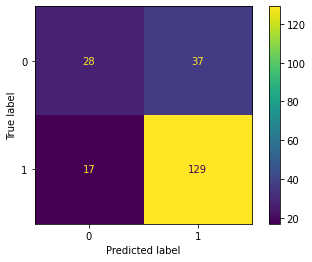

In [28]:
conf_matrix(y_test, gs_preds)